##### 数据准备

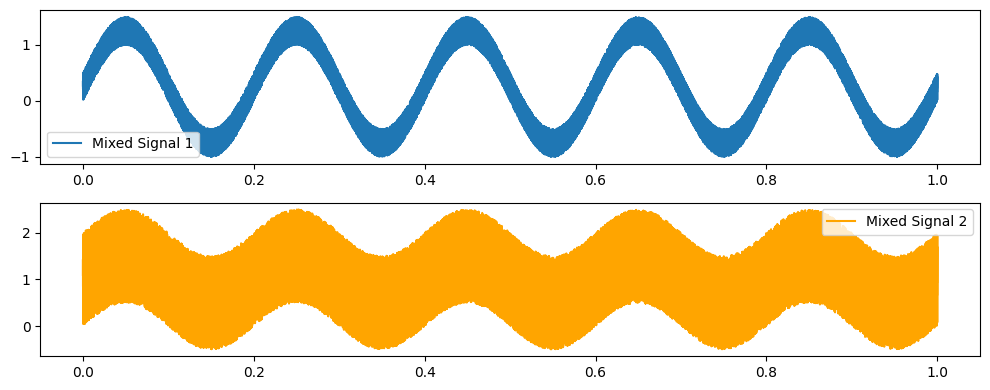

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# 合成两个音频信号
np.random.seed(0)
t = np.linspace(0, 1, 44100, False)  # 采样率为44100，时长为1秒
signal1 = np.sin(2 * np.pi * 5 * t)  # 5 Hz的正弦信号
signal2 = np.random.random(len(t))  # 随机噪音信号

# 线性混合信号
mixing_matrix = np.array([[1, 0.5], [0.5, 2]])
mixed_signals = np.dot(mixing_matrix, np.array([signal1, signal2]))

# 绘制混合信号
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, mixed_signals[0], label='Mixed Signal 1')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, mixed_signals[1], label='Mixed Signal 2', color='orange')
plt.legend()
plt.tight_layout()
plt.show()

##### ICA

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA

# 对数据进行标准化
scaler = StandardScaler()
scaled_mixed_signals = scaler.fit_transform(mixed_signals.T).T

# 创建FastICA对象，指定分离成分的数量
n_components = 2
ica = FastICA(n_components=n_components)
ica_signals = ica.fit_transform(scaled_mixed_signals.T).T

##### 结果绘制

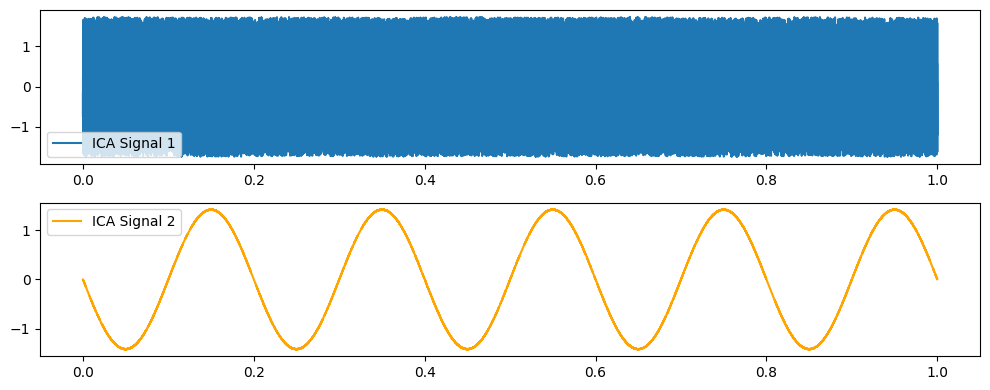

In [6]:
# 绘制分离后的信号
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, ica_signals[0], label='ICA Signal 1')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, ica_signals[1], label='ICA Signal 2', color='orange')
plt.legend()
plt.tight_layout()
plt.show()